Title: Haberman's Survival Data

Sources:
(a) Donor: Tjen-Sien Lim (limt@stat.wisc.edu)
(b) Date: March 4, 1999

Past Usage:

Haberman, S. J. (1976). Generalized Residuals for Log-Linear
Models, Proceedings of the 9th International Biometrics
Conference, Boston, pp. 104-122.
Landwehr, J. M., Pregibon, D., and Shoemaker, A. C. (1984),
Graphical Models for Assessing Logistic Regression Models (with
discussion), Journal of the American Statistical Association 79:
61-83.
Lo, W.-D. (1993). Logistic Regression Trees, PhD thesis,
Department of Statistics, University of Wisconsin, Madison, WI.
Relevant Information:
The dataset contains cases from a study that was conducted between
1958 and 1970 at the University of Chicago's Billings Hospital on
the survival of patients who had undergone surgery for breast
cancer.

Number of Instances: 306

Number of Attributes: 4 (including the class attribute)

Attribute Information:

Age of patient at time of operation (numerical)
Patient's year of operation (year - 1900, numerical)
Number of positive axillary nodes detected (numerical)
Survival status (class attribute)
1 = the patient survived 5 years or longer
2 = the patient died within 5 year
Missing Attribute Values: None

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("haberman.csv")
df.columns=["age","year","nodes","status"]
df.head()

,age,year,nodes,status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [ ]:
df.describe()

,age,year,nodes,status
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [ ]:
df.info

<bound method DataFrame.info of      age  year  nodes  status
0     30    62      3       1
1     30    65      0       1
2     31    59      2       1
3     31    65      4       1
4     33    58     10       1
..   ...   ...    ...     ...
300   75    62      1       1
301   76    67      0       1
302   77    65      3       1
303   78    65      1       2
304   83    58      2       2

[305 rows x 4 columns]>

In [ ]:
df.shape

(305, 4)

In [ ]:
df.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

There are total 305 points in dataset with 3 features age, year, nodes as independent features and status as dependent variable

**Objective** :Classify the status of patient as 1 or 2 based on whether the patient survived 5 years or longer or died within 5 years given 3 features age,nodes and year.

**Univariate Analysis**

In [ ]:
##categorizing data based on class 1 or 2
status_survived=df.loc[df.status==1]
status_died=df.loc[df.status==2]

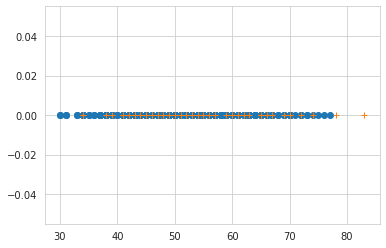

In [ ]:
plt.plot(status_survived["age"],np.zeros_like(status_survived["age"]),'o')
plt.plot(status_died["age"],np.zeros_like(status_died["age"]),'+')

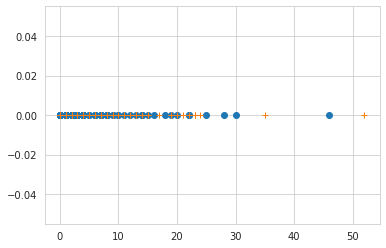

In [ ]:
plt.plot(status_survived["nodes"],np.zeros_like(status_survived["nodes"]),'o')
plt.plot(status_died["nodes"],np.zeros_like(status_died["nodes"]),'+')

As we can see lot of points are overlapped if we perform it on age or nodes feature so this will not help to classify correct status

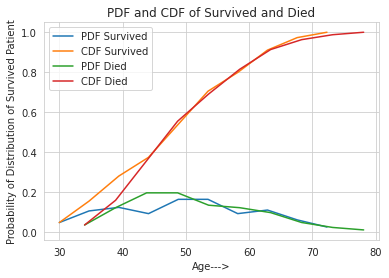

In [ ]:
##pdf and cdf of survived with feat. age
hist_survived,bins=np.histogram(status_survived["age"],bins=10,density=False)
pdf_survived=hist_survived/sum(hist_survived)
cdf_survived =np.cumsum(pdf_survived)
plt.plot(bins[0:-1],pdf_survived, label='PDF Survived')
plt.plot(bins[0:-1],cdf_survived, label='CDF Survived')

##pdf and cdf of died with feat. age
hist_died,bins=np.histogram(status_died["age"],bins=10,density=False)
pdf_died=hist_died/sum(hist_died)
cdf_died =np.cumsum(pdf_died)
plt.plot(bins[0:-1],pdf_died,label='PDF Died')
plt.plot(bins[0:-1],cdf_died,label='CDF Died')
plt.xlabel('Age--->')
plt.ylabel('Probability of Distribution of Survived Patient')
plt.title('PDF and CDF of Survived and Died')
plt.legend()
plt.show()

No Clear conlusion can be made from pdf of age

In [ ]:
hist_survived

array([11, 24, 28, 21, 37, 37, 21, 25, 14,  6])

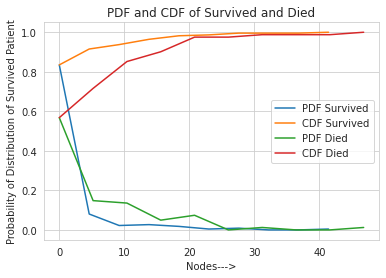

In [ ]:
##pdf and cdf of survived with feat. age
hist_survived,bins=np.histogram(status_survived["nodes"],bins=10,density=False)
pdf_survived=hist_survived/sum(hist_survived)
cdf_survived =np.cumsum(pdf_survived)
plt.plot(bins[0:-1],pdf_survived, label='PDF Survived')
plt.plot(bins[0:-1],cdf_survived, label='CDF Survived')

##pdf and cdf of died with feat. age
hist_died,bins=np.histogram(status_died["nodes"],bins=10,density=False)
pdf_died=hist_died/sum(hist_died)
cdf_died =np.cumsum(pdf_died)
plt.plot(bins[0:-1],pdf_died,label='PDF Died')
plt.plot(bins[0:-1],cdf_died,label='CDF Died')
plt.xlabel('Nodes--->')
plt.ylabel('Probability of Distribution of Survived Patient')
plt.title('PDF and CDF of Survived and Died')
plt.legend()
plt.show()

No clear of conlusion made but patient with less than 5 node has high chance of surviving

**Bivariate Analysis**

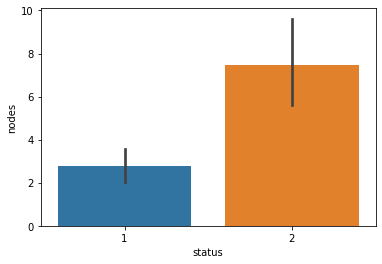

In [ ]:
sns.barplot(x="status",y="nodes",data=df)

There are more patients who died with nodes more than 3

In [ ]:
df.status.value_counts()

1    224
2     81
Name: status, dtype: int64

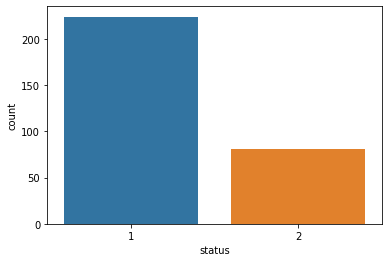

In [ ]:
sns.countplot(x="status",data=df)

Data is imbalanced. More number of patients survived 

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


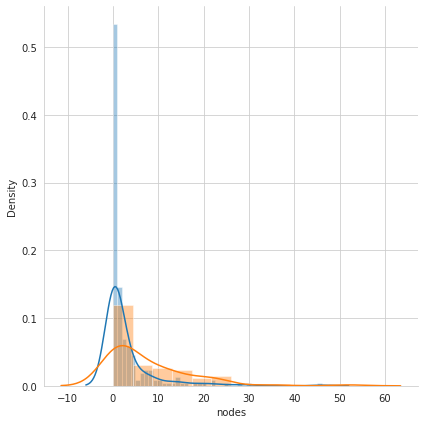

In [ ]:
sns.FacetGrid(df,hue="status",size=6).map(sns.distplot,"nodes")

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


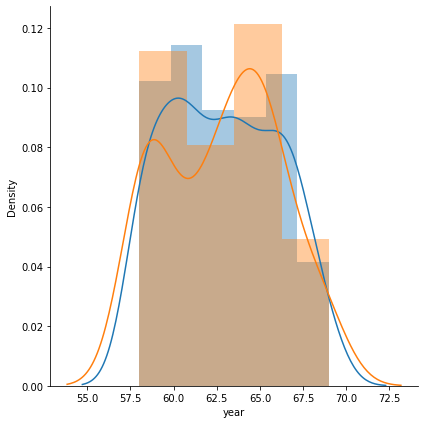

In [ ]:
sns.FacetGrid(df,hue="status",size=6).map(sns.distplot,"year")

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


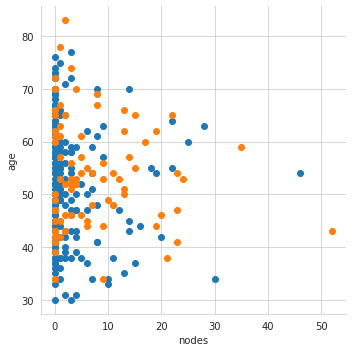

In [ ]:
sns.FacetGrid(df,hue="status",size=5).map(plt.scatter,"nodes","age")

Lot of overlapping with nodes and age in 2D analysis. A clear conclusion cant be made based on above graphs

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


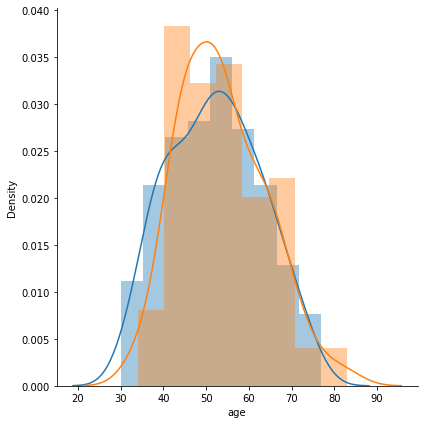

In [ ]:
sns.FacetGrid(df,hue="status",size=6).map(sns.distplot,"age")

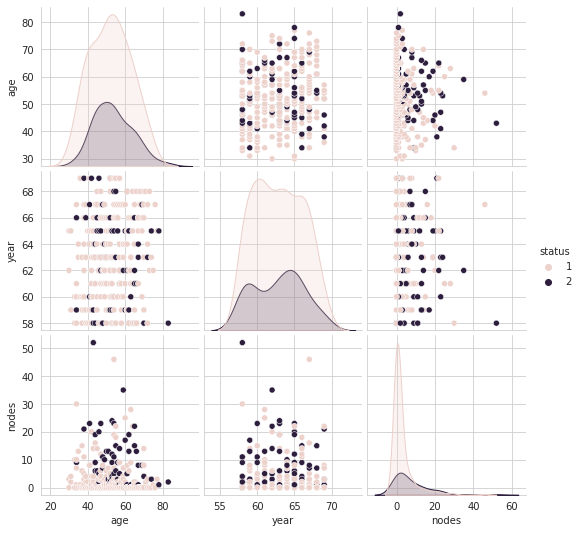

In [ ]:
sns.set_style("whitegrid");
sns.pairplot(df,hue="status")

A lot of overlap with all 3 features age,year,nodes though age and node can be used to differentiate the srrvived and died class

In [ ]:
#Median, Quantiles, Percentiles, IQR.
print("Median of age of survived patients:",np.median(status_survived["age"]))
print("Median of age of died patients:",np.median(status_died["age"]))

print("Median of nodes of survived patients:",np.median(status_survived["nodes"]))
print("Median of nodes of died patients:",np.median(status_died["nodes"]))

Median of age of survived patients: 52.0
Median of age of died patients: 53.0
Median of nodes of survived patients: 0.0
Median of nodes of died patients: 4.0


In [ ]:
print("Quantiles of age of survived patients:",np.percentile(status_survived["age"],np.arange(0, 100, 25)))
print("Quantiles of age of died patients:",np.percentile(status_died["age"],np.arange(0, 100, 25)))

print("Quantiles of nodes of survived patients:",np.percentile(status_survived["nodes"],np.arange(0, 100, 25)))
print("Quantiles of nodes of died patients:",np.percentile(status_died["nodes"],np.arange(0, 100, 25)))

Quantiles of age of survived patients: [30. 43. 52. 60.]
Quantiles of age of died patients: [34. 46. 53. 61.]
Quantiles of nodes of survived patients: [0. 0. 0. 3.]
Quantiles of nodes of died patients: [ 0.  1.  4. 11.]


In [ ]:
print("90th Percentile of age of survived patients",np.percentile(status_survived["age"],90))
print("90th Percentile of age of died patients",np.percentile(status_died["age"],90))

print("90th Percentile of nodes of survived patients",np.percentile(status_survived["nodes"],90))
print("90th Percentile of nodes of died patients",np.percentile(status_died["nodes"],90))

90th Percentile of age of survived patients 67.0
90th Percentile of age of died patients 67.0
90th Percentile of nodes of survived patients 8.0
90th Percentile of nodes of died patients 20.0


In [ ]:
from statsmodels import robust
print("Median Absolute Deviation of age of survived patients",robust.mad(status_survived["age"]))
print("Median Absolute Deviation of age of died patients",robust.mad(status_died["age"]))

print("Median Absolute Deviation of nodes of survived patients",robust.mad(status_survived["nodes"]))
print("Median Absolute Deviation of nodes of died patients",robust.mad(status_died["nodes"]))

Median Absolute Deviation of age of survived patients 13.343419966550417
Median Absolute Deviation of age of died patients 11.860817748044816
Median Absolute Deviation of nodes of survived patients 0.0
Median Absolute Deviation of nodes of died patients 5.930408874022408


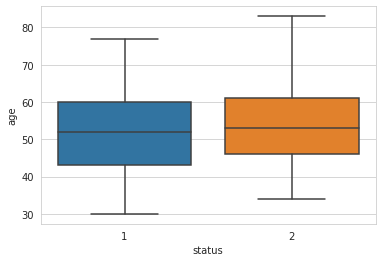

In [ ]:
sns.boxplot(x='status',y='age', data=df)
plt.show()

Percentiles can be observed from above plot like for survived class the 25th percentile is somewhere around 45

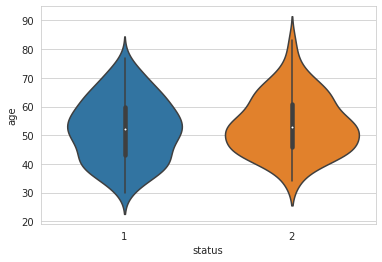

In [ ]:
sns.violinplot(x='status',y='age', data=df)
plt.show()